In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


import seaborn as sns

data_dd = pd.read_csv('/content/sample_data/data-dictionary.csv')
data_dd.head(10)


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [12]:
data = pd.read_csv('/content/sample_data/Country-data.csv')
data.head(10)
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])



In [34]:

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
X = data.drop(['country'],axis=1)
y = data['country']


from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
data_pca = pca_final.fit_transform(X)
data_pca.shape
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


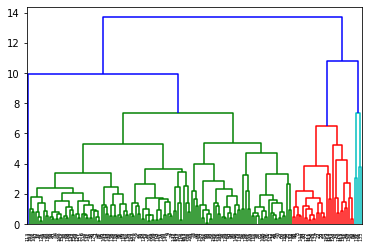

In [31]:
mergings = linkage(data_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [36]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
data_pca_hc = pd.concat([data_pca, clusterCut], axis=1)
data_pca_hc.columns = ["PC1","PC2","PC3","ClusterID"]
data_pca_hc.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,0
1,0.427164,-0.849421,-0.524328,0
2,-0.270015,-0.176265,-1.555131,0
3,-2.928291,2.207142,-0.427484,0
4,1.026479,-0.071315,-0.286053,0


In [40]:
data_pca_hc['ClusterID'].value_counts()

0    132
1     31
2      4
Name: ClusterID, dtype: int64

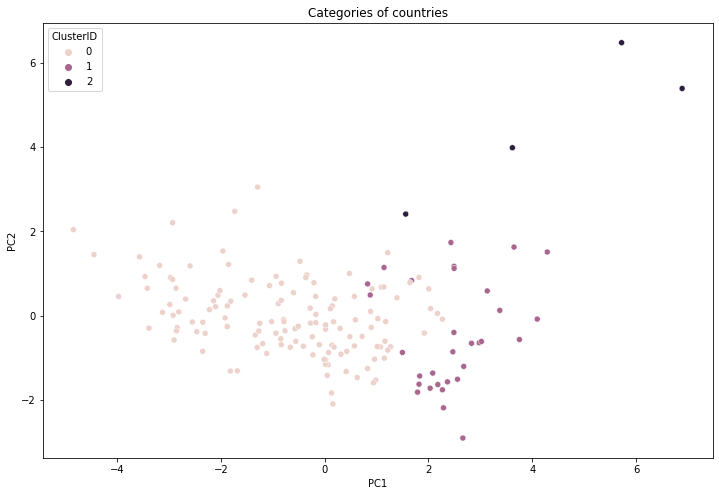

In [42]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_pca_hc)

plt.title('Categories of countries')
plt.show()

In [45]:
data_pre=pd.merge(data,data_pca_hc, left_index=True,right_index=True)
data_drp=data_pre.drop(['PC1','PC2','PC3'],axis=1)
data_drp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [46]:
Cluster_GDPP=pd.DataFrame(data_pre.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(data_pre.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(data_pre.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(data_pre.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(data_pre.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(data_pre.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(data_pre.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(data_pre.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(data_pre.groupby(["ClusterID"]).total_fer.mean())

df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)
df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,-0.424875,0.211467,-0.409265,-0.178594,-0.149078,-0.040659,0.098226,-0.276279,0.184706
1,1.576757,-0.799128,1.501129,0.220628,0.675806,-0.348677,-0.332754,1.047340,-0.669328
2,1.800991,-0.785169,1.871999,4.183747,-0.317932,4.043991,-0.662618,1.000316,-0.908008


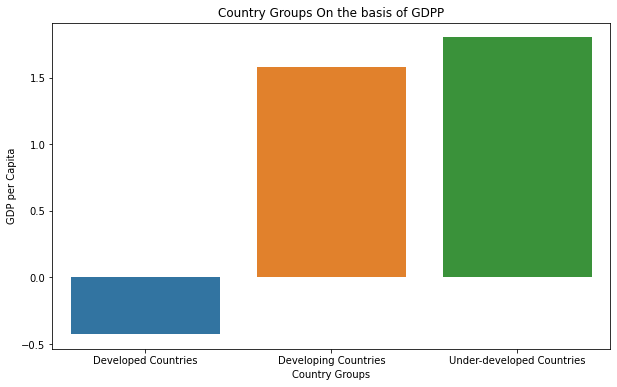

In [51]:
fig = plt.figure(figsize = (10,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='GDPP',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()